## Setup

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

/Users/nicholasbeaudoin/Desktop/ShotLink Analytics


In [2]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

## Query data from SQLite Database for PGA Tour 2018 season

In [4]:
# Query data for Tiger Woods
df = sql.read_sql("""SELECT * FROM Shotlink 
                WHERE Year == '2018'""", con=conn)
print(len(df))

1173231


## Basic Cleaning

In [8]:
### Data cleaning

# Create full player names
df['PlayerFullName'] = df['PlayerLastName'] + ", " + df['PlayerFirstName']

# Convert to numeric values
df['Round'] = pd.to_numeric(df['Round'], errors='coerce')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Hole'] = pd.to_numeric(df['Hole'], errors='coerce')
df['HoleScore'] = pd.to_numeric(df['HoleScore'], errors='coerce')
df['Yardage'] = pd.to_numeric(df['Yardage'], errors='coerce')
df['Shot'] = pd.to_numeric(df['Shot'], errors='coerce')
df['#ofStrokes'] = pd.to_numeric(df['#ofStrokes'], errors='coerce')
df['DistancetoPin'] = pd.to_numeric(df['DistancetoPin'], errors='coerce')
df['DistancetoHoleaftertheShot'] = pd.to_numeric(df['DistancetoHoleaftertheShot'], errors='coerce')
df['DistancefromEdge'] = pd.to_numeric(df['DistancefromEdge'], errors='coerce')
df['StrokesGained/Baseline'] = pd.to_numeric(df['StrokesGained/Baseline'], errors='coerce')

### Normalize Distances

df['DistanceYds'] = df['Distance']//36
df['DistancetoPinYds'] = df['DistancetoPin']//36
df['DistancetoHoleaftertheShotYds'] = df['DistancetoHoleaftertheShot']//36
#df['DistancefromCenterYds'] = df['DistancefromCenter']//36
df['DistancefromEdgeYds'] = df['DistancefromEdge']//36

df['DistanceFt'] = round(df['Distance']/12, 1)
df['DistancetoPinFt'] = round(df['DistancetoPin']/12, 1)
df['DistancetoHoleaftertheShotFt'] = round(df['DistancetoHoleaftertheShot']/12, 1)
#df['DistancefromCenterFt'] = round(df['DistancefromCenter']/12, 1)
df['DistancefromEdgeFt'] = round(df['DistancefromEdge']/12, 1)

In [9]:
# All players that played at least one event on the PGA Tour in 2018
player = set(df['PlayerFullName'])
len(player)

527

In [10]:
dict = {}

for p in player:

    # Subset to all shots that went into the hole
    new_df = df[(df['IntheHoleFlag'] == 'Y') & (df['PlayerFullName'] == p)]
    
    # Get max distance
    max_distance = new_df[(new_df['DistanceYds']) == max(new_df['DistanceYds'])]
    
    # Grab element for distance from pandas series
    distance = max_distance['DistanceYds'].values[0]
    
    # Store to dictionary of player, distance
    dict[p] = distance

In [11]:
# Convert dictionary into Pandas DF
df_distance = pd.DataFrame()
df_distance['Player'] = dict.keys()
df_distance['Distance'] = dict.values()

In [12]:
# Sort the values
df_sorted_distance = df_distance.sort_values(by='Distance', ascending=False)

In [13]:
df_sorted_distance.head()

,Player,Distance
360,"Oppenheim, Rob",261
468,"Kodaira, Satoshi",233
99,"Wallace, Matt",232
178,"Poston, J.T.",224
94,"Hurley III, Billy",223


/Users/nicholasbeaudoin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


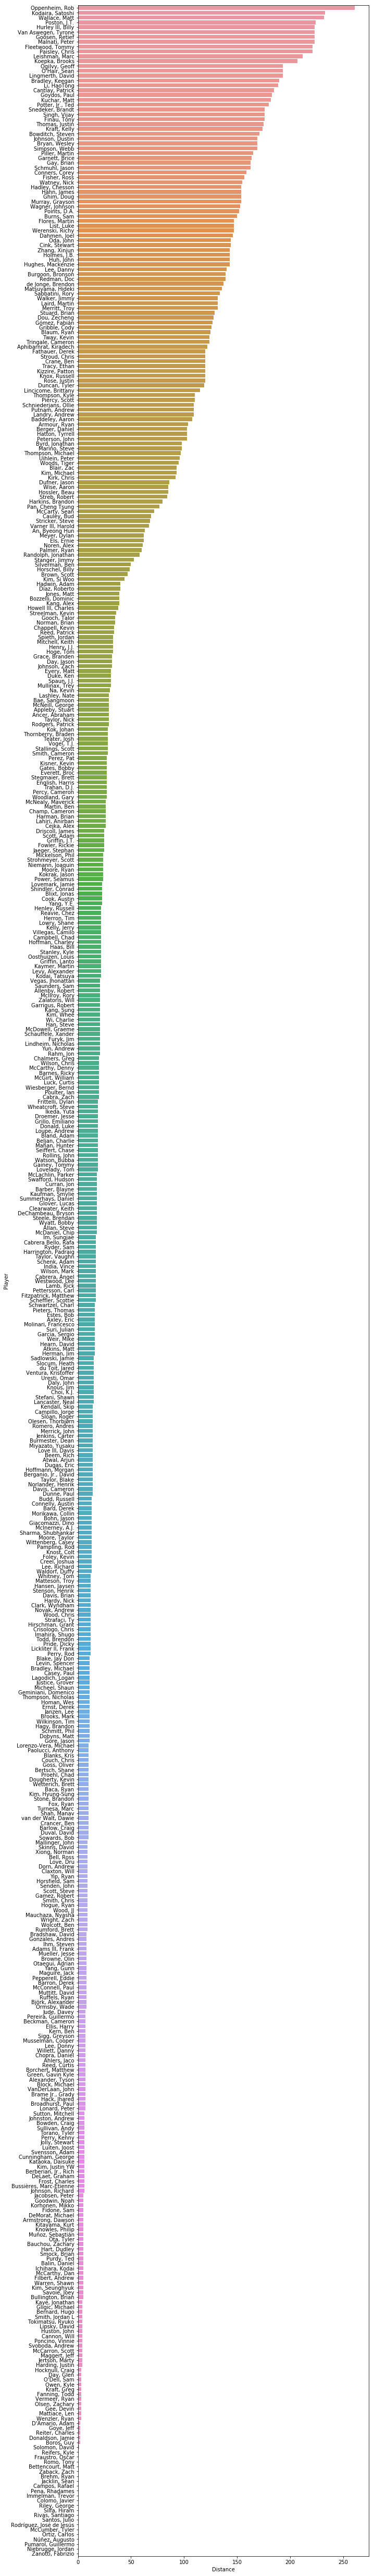

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,90


ax = sns.barplot(x="Distance", y="Player", data=df_sorted_distance)

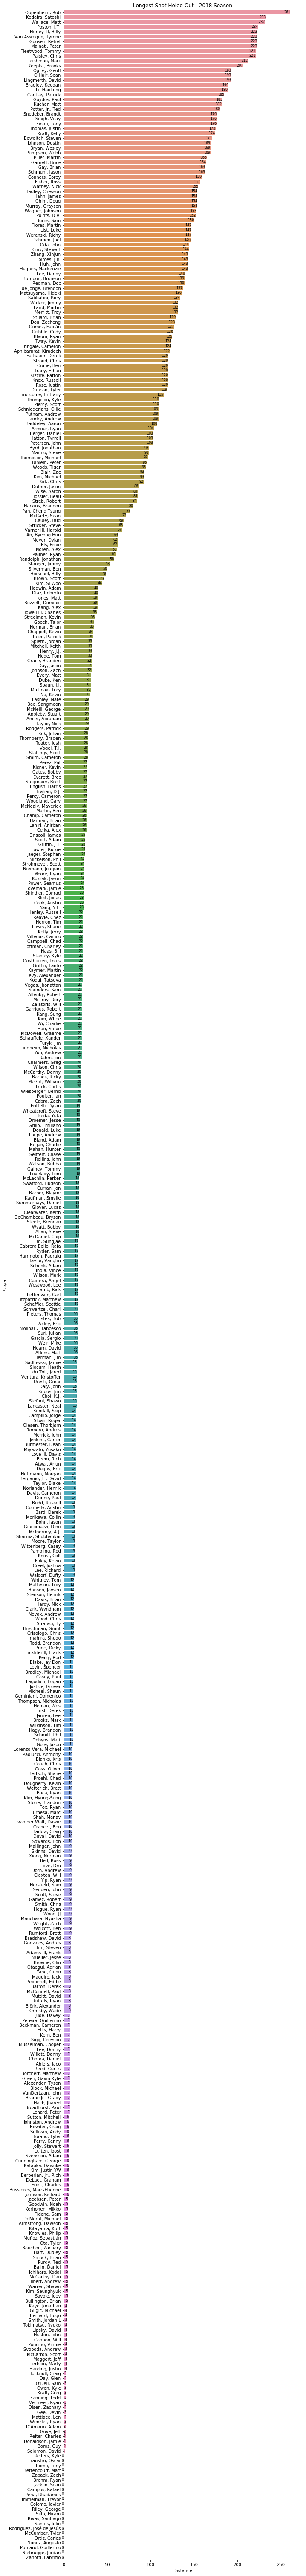

In [15]:
# figure size in inches
rcParams['figure.figsize'] = 10,110


plot = sns.barplot(x="Distance", y="Player", data=df_sorted_distance).set_title("Longest Shot Holed Out - 2018 Season")

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            fontsize=8, color='black', ha='right', va='center')